<a href="https://colab.research.google.com/github/himcha-ni/ME459_HW7/blob/main/HW7_20170417_%EC%9C%A0%EA%B7%9C%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
          nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
          nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
          nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

In [ ]:
batch_size = 32

train_dataset = datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

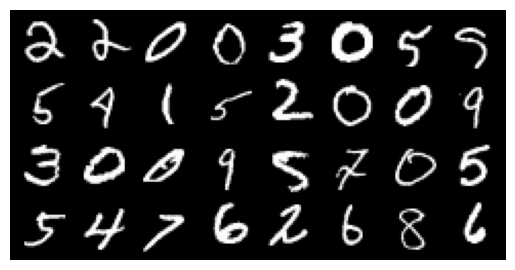

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [ ]:
cnn_model = CNN().to(device)
cnn_criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001)

In [ ]:
mlp_model = MLP().to(device)
mlp_criterion = nn.CrossEntropyLoss()
mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=0.0001)

In [ ]:
num_epochs = 50

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.cuda()
        labels = labels.cuda()

        # Forward pass
        outputs = mlp_model(images)
        loss = mlp_criterion(outputs, labels)

        # Backward and optimize
        mlp_optimizer.zero_grad()
        loss.backward()
        mlp_optimizer.step()

        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
mlp_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
      images = images.cuda()
      labels = labels.cuda()
      outputs = mlp_model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).cpu().sum().item()

    print('Test Accuracy : {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(mlp_model.state_dict(), 'mlp_model.ckpt')

Epoch [1/50], Step [1000/1875], Loss: 0.3460
Epoch [2/50], Step [1000/1875], Loss: 0.3518
Epoch [3/50], Step [1000/1875], Loss: 0.1241
Epoch [4/50], Step [1000/1875], Loss: 0.3174
Epoch [5/50], Step [1000/1875], Loss: 0.2044
Epoch [6/50], Step [1000/1875], Loss: 0.1784
Epoch [7/50], Step [1000/1875], Loss: 0.0413
Epoch [8/50], Step [1000/1875], Loss: 0.2219
Epoch [9/50], Step [1000/1875], Loss: 0.0149
Epoch [10/50], Step [1000/1875], Loss: 0.0094
Epoch [11/50], Step [1000/1875], Loss: 0.1308
Epoch [12/50], Step [1000/1875], Loss: 0.0360
Epoch [13/50], Step [1000/1875], Loss: 0.0135
Epoch [14/50], Step [1000/1875], Loss: 0.0226
Epoch [15/50], Step [1000/1875], Loss: 0.0123
Epoch [16/50], Step [1000/1875], Loss: 0.0328
Epoch [17/50], Step [1000/1875], Loss: 0.0164
Epoch [18/50], Step [1000/1875], Loss: 0.0119
Epoch [19/50], Step [1000/1875], Loss: 0.0776
Epoch [20/50], Step [1000/1875], Loss: 0.1151
Epoch [21/50], Step [1000/1875], Loss: 0.0930
Epoch [22/50], Step [1000/1875], Loss: 0.02

In [ ]:
num_epochs = 50


total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.cuda()
        labels = labels.cuda()

        # Forward pass
        outputs = cnn_model(images)
        loss = cnn_criterion(outputs, labels)

        # Backward and optimize
        cnn_optimizer.zero_grad()
        loss.backward()
        cnn_optimizer.step()

        if (i+1) % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
cnn_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy : {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(cnn_model.state_dict(), 'cnn_model.ckpt')

Epoch [1/50], Step [1000/1875], Loss: 0.3204
Epoch [2/50], Step [1000/1875], Loss: 0.0483
Epoch [3/50], Step [1000/1875], Loss: 0.1345
Epoch [4/50], Step [1000/1875], Loss: 0.0598
Epoch [5/50], Step [1000/1875], Loss: 0.1446
Epoch [6/50], Step [1000/1875], Loss: 0.0164
Epoch [7/50], Step [1000/1875], Loss: 0.0182
Epoch [8/50], Step [1000/1875], Loss: 0.0116
Epoch [9/50], Step [1000/1875], Loss: 0.0298
Epoch [10/50], Step [1000/1875], Loss: 0.0002
Epoch [11/50], Step [1000/1875], Loss: 0.0316
Epoch [12/50], Step [1000/1875], Loss: 0.0107
Epoch [13/50], Step [1000/1875], Loss: 0.0006
Epoch [14/50], Step [1000/1875], Loss: 0.0109
Epoch [15/50], Step [1000/1875], Loss: 0.0057
Epoch [16/50], Step [1000/1875], Loss: 0.0147
Epoch [17/50], Step [1000/1875], Loss: 0.0016
Epoch [18/50], Step [1000/1875], Loss: 0.0002
Epoch [19/50], Step [1000/1875], Loss: 0.0002
Epoch [20/50], Step [1000/1875], Loss: 0.0008
Epoch [21/50], Step [1000/1875], Loss: 0.0005
Epoch [22/50], Step [1000/1875], Loss: 0.00

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
INPUT_DIR='/content/drive/MyDrive/Colab Notebooks/MNIST_test'

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
correct = 0
total = 0

for i in range(10):
  for j in range(5):
    # print(str(i)+str(j))
    name = str(i)+str(j)+'.png'

    image = Image.open(os.path.join(INPUT_DIR, name)).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to match model input size
    image = transforms.ToTensor()(image)  # Convert to tensor
    image = (1-image) # black/ white inverted image
    image = image.unsqueeze(0)  # Add a batch dimension

    with torch.no_grad():
      check = cnn_model(image.cuda())
      # print("Pred : ", torch.argmax(check, 1).item())
      # plt.imshow(image.view(28,28), cmap = 'Greys', interpolation = 'nearest')
      # plt.show()
      _, predicted = torch.max(check.data, 1)
      correct += (predicted == torch.tensor(i, dtype=torch.int8)).sum().item()

      # print(torch.tensor(i, dtype=torch.int8))
print('Test Accuracy : {} %'.format(100 * correct / 50))

Test Accuracy : 80.0 %


In [ ]:
correct = 0
total = 0

for i in range(10):
  for j in range(5):
    # print(str(i)+str(j))
    name = str(i)+str(j)+'.png'

    image = Image.open(os.path.join(INPUT_DIR, name)).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to match model input size
    image = transforms.ToTensor()(image)  # Convert to tensor
    image = (1-image)  # black/ white inverted image
    image = image.unsqueeze(0)  # Add a batch dimension

    with torch.no_grad():
      check = mlp_model(image.cuda())
      # print("Pred : ", torch.argmax(check, 1).item())
      # plt.imshow(image.view(28,28), cmap = 'Greys', interpolation = 'nearest')
      # plt.show()
      _, predicted = torch.max(check.data, 1)
      correct += (predicted == torch.tensor(i, dtype=torch.int8)).sum().item()

      # print(torch.tensor(i, dtype=torch.int8))
print('Test Accuracy : {} %'.format(100 * correct / 50))

Test Accuracy : 62.0 %


In [ ]:

# Load and preprocess the image
image = Image.open(os.path.join(INPUT_DIR, '41.png')).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to match model input size
image = transforms.ToTensor()(image)  # Convert to tensor
image = 1-image  # black/ white inverted image
image = image.unsqueeze(0)  # Add a batch dimension

Pred :  4


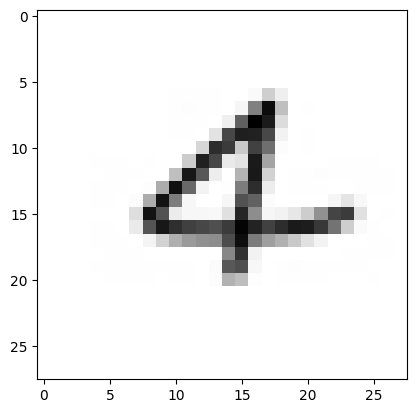

In [ ]:
with torch.no_grad():
  check = cnn_model(image.cuda())
  print("Pred : ", torch.argmax(check, 1).item())

  plt.imshow(image.view(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.show()

Pred :  4


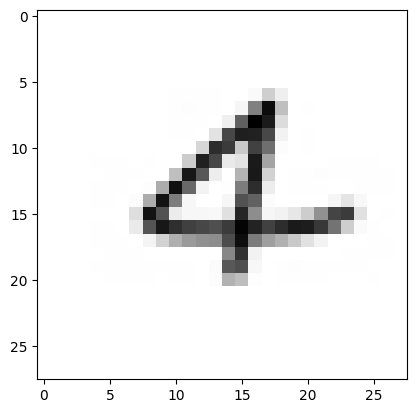

In [ ]:
with torch.no_grad():
  check = mlp_model(image.cuda())
  print("Pred : ", torch.argmax(check, 1).item())

  plt.imshow(image.view(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.show()